# <u>Geometric image classification substructure of the Hornsund Fjord: Mechanical Engineering applications in remote sensing and Geography Information Systems (GIS) </u>  <br /> <sub> <span style="font-size:smaller;"> Jullian C.B. Williams </span> </sub> <br /> <sub> <span style="font-size:smaller;"> *Polish Academy of Sciences, Institute of Geophysics, Warsaw, Poland* </span> </sub>


In [ ]:
# !pip install shapely
# !pip install geopandas
# !pip install fiona
# !pip install rasterstats
# !pip install spectral
# !pip install pyarrow

In [1]:
import emoji #<---- Death and taxes are for certain. Try to have fun before you're 6 feet too far under to.
from rich.console import Console #<---- Ditto.

import fiona
import random
import warnings
import argparse, os
import pyarrow as pa
from shapely.geometry import box
from shapely.geometry import shape
from shapely.geometry import Polygon
from shapely.affinity import translate

import numpy as np
import pandas as pd
from osgeo import ogr
from osgeo import gdal #<---- to geospatial env.
import geopandas as gpd

from PIL import Image

import rasterio.mask
import rasterio as rio
from rasterio.plot import show
from rasterio.plot import show_hist 
from rasterstats import zonal_stats
from rasterio.features import shapes
from rasterio.plot import adjust_band
from rasterio.features import rasterize

import seaborn as sns
import matplotlib.image
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib import patches as mpatches
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable

from spectral import *
from sklearn import svm
from scipy import stats
from scipy import ndimage
from sklearn.svm import SVC
from scipy.ndimage import zoom
from scipy.ndimage import sobel
from scipy.stats import entropy
import spectral.io.envi as envi #run PCA
from sklearn.svm import LinearSVC
from skimage import io, transform # from scipy.misc import imresize  <---- here...we...go..
from skimage.morphology import disk #manage disk while running.
from skimage.segmentation import slic
from skimage.util import img_as_ubyte #Avoid precision loss converting image of type float32 to uint8 as required by rank filters.
from skimage.filters.rank import entropy #for GLCM entropy.
from sklearn.pipeline import make_pipeline
from skimage.segmentation import chan_vese
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from skimage.feature import graycomatrix, graycoprops # from skimage.feature import greycomatrix, greycoprops <--- depreciated or..? lang.
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

%matplotlib inline

## SVM process

C:\Users\jullian.williams\AppData\Local\Temp\ipykernel_15152\378217178.py:162: UserWarning: Adding colorbar to a different Figure <Figure size 640x480 with 1 Axes> than <Figure size 600x600 with 2 Axes> which fig.colorbar is called on.
  cbar = fig2.colorbar(image1, ax=axes2, extend='both')


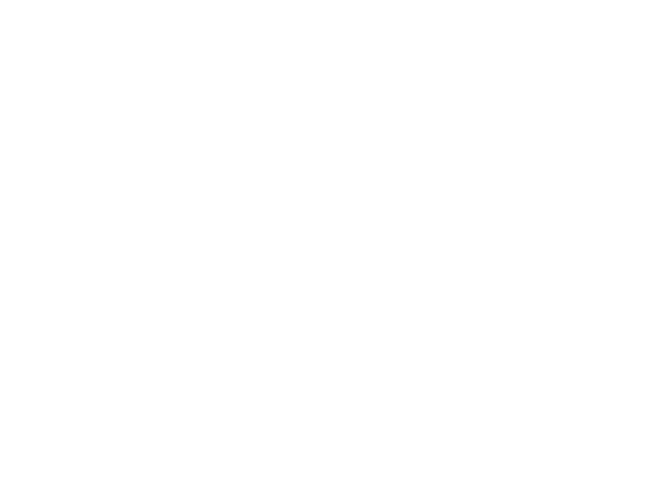

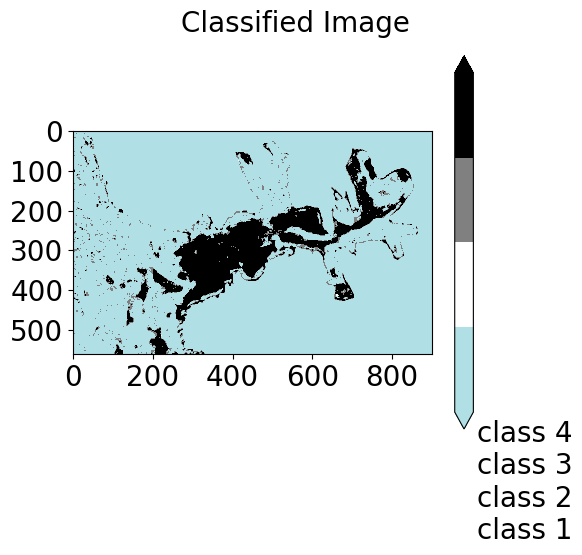

In [8]:
raster_path = "C:/Users/jullian.williams/Desktop/HIRLOMAP/output_bandsSVMtrain_Pair.tif"
with rio.open(raster_path) as src:
    image = src.read()  # Read all bands
    profile = src.profile  # Save metadata
    b1 = src.read(1)
    b2 = src.read(2)
    b3 = src.read(3)
    b4 = src.read(4)
    b5 = src.read(5)
    b6 = src.read(6)
    b7 = src.read(7)
    b8 = src.read(8)
    b9 = src.read(9)
    b10 = src.read(10)
    b11 = src.read(11)
    b12 = src.read(12)
    b13 = src.read(13)
    b14 = src.read(14)

    image = np.moveaxis(image, 0, -1)  # Rearrange to (rows, cols, bands)

    bands = np.dstack((b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,b12,b13,b14))  # <-- Why must b1 be alpha? Odd.
    bands = bands.reshape(int(np.prod(bands.shape)/14),14)

# raster_path_ = "C:/Users/jullian.williams/Desktop/HIRLOMAP/frnd/ALL_SAT/composite/RS2/GLCM_stack/RS2_SCNA_20130628_154748_ASC_101_einc_9f05602b_4f4d_408d_bd24_4a090af4f0d0.tif"
raster_path_ = "C:/Users/jullian.williams/Desktop/HIRLOMAP/frnd/ALL_SAT/composite/RS2/GLCM_stack/RS2_SCWA_20120604_063534_DES_024_einc_6d27c7e4_387c_4ef5_8bf0_67292936a568.tif"
with rio.open(raster_path_) as src_:
    # image_, transformed = rio.mask.mask(src_, shapes, crop=True, filled=True)
    # image_ = src_.read()  # Read all bands
    profile_ = src_.profile  # Save metadata
    transform_ = src_.transform  # Save metadata
    b1_ = src_.read(1)
    b2_ = src_.read(2)
    b3_ = src_.read(3)
    b4_ = src_.read(4)
    b5_ = src_.read(5)
    b6_ = src_.read(6)
    b7_ = src_.read(7)
    b8_ = src_.read(8)
    b9_ = src_.read(9)
    b10_ = src_.read(10)
    b11_ = src_.read(11)
    b12_ = src_.read(12)
    b13_ = src_.read(13)
    b14_ = src_.read(14)

    b1_ = np.where(np.isinf(b1_), np.nan, b1_)
    b2_ = np.where(np.isinf(b2_), np.nan, b2_)          
    b3_ = np.where(np.isinf(b3_), np.nan, b3_)
    b4_ = np.where(np.isinf(b4_), np.nan, b4_)
    b5_ = np.where(np.isinf(b5_), np.nan, b5_)
    b6_ = np.where(np.isinf(b6_), np.nan, b6_)
    b7_ = np.where(np.isinf(b7_), np.nan, b7_)
    b8_ = np.where(np.isinf(b8_), np.nan, b8_)
    b9_ = np.where(np.isinf(b9_), np.nan, b9_)
    b10_ = np.where(np.isinf(b10_), np.nan, b10_)
    b11_ = np.where(np.isinf(b11_), np.nan, b11_)
    b12_ = np.where(np.isinf(b12_), np.nan, b12_)
    b13_ = np.where(np.isinf(b13_), np.nan, b13_)
    b14_ = np.where(np.isinf(b14_), np.nan, b14_)
                
    nan1 = 9
    nan2 = 81
    
    b1_ = np.nan_to_num(b1_, nan=nan1)
    b2_ = np.nan_to_num(b2_, nan=nan1)
    b3_ = np.nan_to_num(b3_, nan=nan1)
    b4_ = np.nan_to_num(b4_, nan=nan1)
    b5_ = np.nan_to_num(b5_, nan=nan2)
    b6_ = np.nan_to_num(b6_, nan=nan2)
    b7_ = np.nan_to_num(b7_, nan=nan1)
    b8_ = np.nan_to_num(b8_, nan=nan1)
    b9_ = np.nan_to_num(b9_, nan=nan1)
    b10_ = np.nan_to_num(b10_, nan=nan1)
    b11_ = np.nan_to_num(b11_, nan=nan1)
    b12_ = np.nan_to_num(b12_, nan=nan1)
    b13_ = np.nan_to_num(b13_, nan=nan2)
    b14_ = np.nan_to_num(b14_, nan=nan2)


    mask1 = (b1_ ==9) & (b1_== 81)
    mask2 = (b2_ ==9) & (b2_== 81)
    mask3 = (b3_ ==9) & (b3_== 81)
    mask4 = (b4_ ==9) & (b4_== 81)
    mask5 = (b5_ ==9) & (b5_== 81)
    mask6 = (b6_ ==9) & (b6_== 81)
    mask7 = (b7_ ==9) & (b7_== 81)
    mask8 = (b8_ ==9) & (b8_== 81)
    mask9 = (b9_ ==9) & (b9_== 81)
    mask10 = (b10_ ==9) & (b10_== 81)
    mask11 = (b11_ ==9) & (b11_== 81)
    mask12 = (b12_ ==9) & (b12_== 81)
    mask13 = (b13_ ==9) & (b13_== 81)
    mask14 = (b14_ ==9) & (b14_== 81)
    
    b1_ = np.ma.masked_array(b1_, mask1)
    b2_ = np.ma.masked_array(b2_, mask2)
    b3_ = np.ma.masked_array(b3_, mask3)
    b4_ = np.ma.masked_array(b4_, mask4)
    b5_ = np.ma.masked_array(b5_, mask5)
    b6_ = np.ma.masked_array(b6_, mask6)
    b7_ = np.ma.masked_array(b7_, mask7)
    b8_ = np.ma.masked_array(b8_, mask8)
    b9_ = np.ma.masked_array(b9_, mask9)
    b10_ = np.ma.masked_array(b10_, mask10)
    b11_ = np.ma.masked_array(b11_, mask11)
    b12_ = np.ma.masked_array(b12_, mask12)
    b13_ = np.ma.masked_array(b13_, mask13)
    b14_ = np.ma.masked_array(b14_, mask14)

    # image_ = np.moveaxis(image_, 0, -1)  # Rearrange to (rows, cols, bands)

    bands_ = np.dstack((b1_,b2_,b3_,b4_,b5_,b6_,b7_,b8_,b9_,b10_,b11_,b12_,b13_,b14_))  # <-- Why must b1 be alpha? Odd.
    bands_ = bands_.reshape(int(np.prod(bands_.shape)/14),14)


# Step 2: Load the shapefile
shapefile_path = "C:/Users/jullian.williams/Desktop/HIRLOMAP/ROI/PTS_MERGED/HS_ice_water_MASTER_.shp"
shapefile = gpd.read_file(shapefile_path)

# Step 3: Extract training data
# Assuming the shapefile has a 'class' column for labels
training_data = []
labels = []

for _, row in shapefile.iterrows():
    geom = row.geometry
    label = row['Class_']
    mask = rio.features.geometry_mask([geom], transform=profile['transform'], invert=True, out_shape=image.shape[:2])
    pixels = image[mask]
    training_data.append(pixels)
    labels.extend([label] * len(pixels))

training_data = np.vstack(training_data)
labels = np.array(labels)

# Step 4: Train the SVM model
X_train, X_test, y_train, y_test = train_test_split(training_data, labels, test_size=0.3, random_state=42)
clf = make_pipeline(StandardScaler(),LinearSVC(random_state=0, tol=1e-3))
clf.fit(X_train, y_train)

# Step 5: Classify the image
predicted = clf.predict(bands_) #Predict using the model
class_image = predicted.reshape(b1_.shape)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy:.2f}")

# Generate classification report
report = classification_report(y_test, y_pred)
# print(report)

cmap_ = ListedColormap(['white','powderblue','gray','black'])
cmap_1 = ListedColormap(['powderblue','white','gray','black'])
fig1, axes1 = plt.subplots()
fig2, axes2 = plt.subplots(figsize=(6,6))
image1 = axes1.imshow(class_image, cmap=cmap_1)
fig1.gca().set_visible(False)
image2 = axes2.imshow(class_image,cmap=cmap_)
cbar = fig2.colorbar(image1, ax=axes2, extend='both')
cbar.ax.get_yaxis().set_ticks([])
for j, lab in enumerate(['class 1','class 2','class 3','class 4']):
    cbar.ax.text(1.2, (4 * j + 1) / 14.0, lab, ha='left', va='top',fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
fig2.suptitle("Classified Image",fontsize=20)
fig2.subplots_adjust(top=1.0)
# plt.savefig('C:/Users/jullian.williams/Desktop/HIRLOMAP/amend_classification_SVM/img.png',dpi=1500,     #resoluton  
#            bbox_inches='tight',  # Tight layout
#            pad_inches=0.1,       # Padding
#            facecolor='white',    # Background color
#            edgecolor='none',     # Edge color
#            format='png')
plt.tight_layout()
plt.show()

## Convert the SVM image to vector to overlay

In [9]:
class_gdf = class_image
# Extract shapes (polygons) and values
results = (
    {"properties": {"value": value}, "geometry": shape(geom)}
    for geom, value in shapes(class_gdf, transform=transform_))
#     if value != -50  # Exclude no-data or background values
# )

# Convert to GeoDataFrame
class_gdf = gpd.GeoDataFrame.from_features(results, crs=src_.crs)

In [10]:
print(results)

<generator object <genexpr> at 0x000001D87164B120>


In [11]:
print(class_gdf)

                                               geometry  value
0     POLYGON ((498975 8559025, 498975 8558975, 4990...    4.0
1     POLYGON ((500325 8559025, 500325 8558975, 5003...    4.0
2     POLYGON ((499375 8559025, 499375 8558975, 4994...    4.0
3     POLYGON ((499675 8559025, 499675 8558975, 4997...    4.0
4     POLYGON ((499125 8558925, 499125 8558875, 4992...    4.0
...                                                 ...    ...
4983  POLYGON ((514625 8531025, 514625 8530975, 5146...    3.0
4984  POLYGON ((514825 8531075, 514825 8531025, 5147...    2.0
4985  POLYGON ((515275 8531025, 515275 8530975, 5153...    3.0
4986  POLYGON ((515325 8531025, 515325 8530975, 5154...    4.0
4987  POLYGON ((515425 8531025, 515425 8530975, 5154...    3.0

[4988 rows x 2 columns]


In [12]:
class_gdf['area'] = class_gdf.geometry.area
class_gdf['perimeter'] = class_gdf.geometry.length
class_gdf['centroid'] = class_gdf.geometry.centroid
# Extract latitude and longitude from centroids
class_gdf['longitude'] = class_gdf.centroid.x
class_gdf['latitude'] = class_gdf.centroid.y
class_gdf.set_crs(epsg=32633, inplace=True)

,geometry,value,area,perimeter,centroid,longitude,latitude
0,"POLYGON ((498975 8559025, 498975 8558975, 4990...",4.0,2500.0,200.0,POINT (499000 8559000),499000.000000,8.559000e+06
1,"POLYGON ((500325 8559025, 500325 8558975, 5003...",4.0,2500.0,200.0,POINT (500350 8559000),500350.000000,8.559000e+06
2,"POLYGON ((499375 8559025, 499375 8558975, 4994...",4.0,22500.0,700.0,POINT (499511.111 8558977.778),499511.111111,8.558978e+06
3,"POLYGON ((499675 8559025, 499675 8558975, 4997...",4.0,17500.0,700.0,POINT (499785.714 8558964.286),499785.714286,8.558964e+06
4,"POLYGON ((499125 8558925, 499125 8558875, 4992...",4.0,5000.0,300.0,POINT (499175 8558900),499175.000000,8.558900e+06
...,...,...,...,...,...,...,...
4983,"POLYGON ((514625 8531025, 514625 8530975, 5146...",3.0,2500.0,200.0,POINT (514650 8531000),514650.000000,8.531000e+06
4984,"POLYGON ((514825 8531075, 514825 8531025, 5147...",2.0,22500.0,800.0,POINT (514916.667 8531016.667),514916.666667,8.531017e+06
4985,"POLYGON ((515275 8531025, 515275 8530975, 5153...",3.0,2500.0,200.0,POINT (515300 8531000),515300.000000,8.531000e+06
4986,"POLYGON ((515325 8531025, 515325 8530975, 5154...",4.0,5000.0,300.0,POINT (515375 8531000),515375.000000,8.531000e+06


In [6]:
# Function to calculate orientation
def calculate_orientation(geometry):
    coords = np.array(geometry.exterior.coords)
    x = coords[:, 0]
    y = coords[:, 1]
    
    # Covariance matrix
    cov_matrix = np.cov(x, y)
    
    # Eigenvalues and eigenvectors
    eigvals, eigvecs = np.linalg.eig(cov_matrix)
    
    # Orientation angle (radians to degrees)
    largest_eigenvec = eigvecs[:, np.argmax(eigvals)]
    angle = np.arctan2(largest_eigenvec[1], largest_eigenvec[0])
    return np.degrees(angle)

# Function to calculate roundness
roundness = (4 * np.pi * class_gdf['area']) / (class_gdf['perimeter'] ** 2)

# Apply orientation calculation
class_gdf["orientation"] = class_gdf.geometry.apply(calculate_orientation)
class_gdf["roundness"] = roundness
class_gdf.set_crs(epsg=32633, inplace=True)
gdf = class_gdf

# Display results
# print(gdf[["geometry", "centroid", "orientation","roundness"]])

### Quadrant slice to shapes and dissove

In [7]:
brepollen = gdf[(530000 <= gdf['longitude']) & (gdf['longitude'] <= 541628.7) & (gdf['latitude'] >= 8.542e+06) & (gdf['latitude'] <= 8.558e+06)] #533500
samarinvagen = gdf[(529000 <= gdf['longitude']) & (gdf['longitude'] <= 533000) & (gdf['latitude'] <= 8.545e+06) & (gdf['latitude'] <= 8.558e+06)]
burgerbukta = gdf[(519000 <= gdf['longitude']) & (gdf['longitude'] <= 528000) & (gdf['latitude'] >= 8.549e+06) & (gdf['latitude'] <= 8.558e+06)]
isbjornhamna = gdf[(513300 <= gdf['longitude']) & (gdf['longitude'] <= 517000) & (gdf['latitude'] >= 8.5470e+06) & (gdf['latitude'] <= 8.550e+06)]
greenlandsea = gdf[(498900 <= gdf['longitude']) & (gdf['longitude'] <= 513300)]
hornsund_quadrant1 = gdf[(513300 <= gdf['longitude']) & (gdf['longitude'] <= 520000) & (gdf['latitude'] >= 8.5350e+06) & (gdf['latitude'] <= 8.5470e+06)]
hornsund_quadrant2 = gdf[(525000 <= gdf['longitude']) & (gdf['longitude'] <= 528000) & (gdf['latitude'] >= 8.5350e+06) & (gdf['latitude'] <= 8.5490e+06)]
hornsund_quadrant3 = gdf[(520000 <= gdf['longitude']) & (gdf['longitude'] <= 523400) & (gdf['latitude'] >= 8.5350e+06) & (gdf['latitude'] <= 8.5440e+06)]
hornsund_quadrant4 = gdf[(528000 <= gdf['longitude']) & (gdf['longitude'] <= 530000) & (gdf['latitude'] >= 8.535e+06) & (gdf['latitude'] <= 8.550e+06)]
mainbasin = pd.concat([greenlandsea, hornsund_quadrant1, hornsund_quadrant2, hornsund_quadrant3, hornsund_quadrant4])


In [8]:
bpln_Nlent = brepollen[(-90 <= brepollen['orientation']) & (brepollen['orientation'] <= 0) & (brepollen['area'] >= 50000) & (brepollen['roundness'] <= 0.6)]
bpln_N_lent = brepollen[(0 <= brepollen['orientation']) & (brepollen['orientation'] <= 90) & (brepollen['area'] >= 50000) & (brepollen['roundness'] <= 0.6)]
bplnlent = pd.concat([bpln_Nlent, bpln_N_lent])

bpln_Nrd = brepollen[(-90 <= brepollen['orientation']) & (brepollen['orientation'] <= 0) & (brepollen['area'] >= 50000) & (brepollen['roundness'] >= 0.6)]
bpln_N_rd = brepollen[(0 <= brepollen['orientation']) & (brepollen['orientation'] <= 90) & (brepollen['area'] >= 50000) & (brepollen['roundness'] >= 0.6)]
bplnrd = pd.concat([bpln_Nrd, bpln_N_rd])
bpln_fjord = pd.concat([bplnlent, bplnrd])

In [9]:
samar_Nlent = samarinvagen[(-90 <= samarinvagen['orientation']) & (samarinvagen['orientation'] <= 0) & (samarinvagen['area'] >= 50000) & (samarinvagen['roundness'] <= 0.6)]
samar_N_lent = samarinvagen[(0 <= samarinvagen['orientation']) & (samarinvagen['orientation'] <= 90) & (samarinvagen['area'] >= 50000) & (samarinvagen['roundness'] <= 0.6)]
samarlent = pd.concat([samar_Nlent, samar_N_lent])

samar_Nrd = samarinvagen[(-90 <= samarinvagen['orientation']) & (samarinvagen['orientation'] <= 0) & (samarinvagen['area'] >= 50000) & (samarinvagen['roundness'] >= 0.4)]
samar_N_rd = samarinvagen[(0 <= samarinvagen['orientation']) & (samarinvagen['orientation'] <= 90) & (samarinvagen['area'] >= 50000) & (samarinvagen['roundness'] >= 0.4)]
samarrd = pd.concat([samar_Nrd, samar_N_rd])
samar_fjord = pd.concat([samarlent, samarrd])

In [10]:
burg_Nlent = burgerbukta[(-90 <= burgerbukta['orientation']) & (burgerbukta['orientation'] <= 0) & (burgerbukta['area'] >= 50000) & (burgerbukta['roundness'] <= 0.6)]
burg_N_lent = burgerbukta[(0 <= burgerbukta['orientation']) & (burgerbukta['orientation'] <= 90) & (burgerbukta['area'] >= 50000) & (burgerbukta['roundness'] <= 0.6)]
burglent = pd.concat([burg_Nlent, burg_N_lent])

burg_Nrd = burgerbukta[(-90 <= burgerbukta['orientation']) & (burgerbukta['orientation'] <= 0) & (burgerbukta['area'] >= 50000) & (burgerbukta['roundness'] >= 0.2)]
burg_N_rd = burgerbukta[(0 <= burgerbukta['orientation']) & (burgerbukta['orientation'] <= 90) & (burgerbukta['area'] >= 50000) & (burgerbukta['roundness'] >= 0.2)]
burgrd = pd.concat([burg_Nrd, burg_N_rd])
burg_fjord = pd.concat([burglent, burgrd])

In [11]:
isbj_Nlent = isbjornhamna[(-90 <= isbjornhamna['orientation']) & (isbjornhamna['orientation'] <= 0) & (isbjornhamna['area'] >= 50000) & (isbjornhamna['roundness'] <= 0.6)]
isbj_N_lent = isbjornhamna[(0 <= isbjornhamna['orientation']) & (isbjornhamna['orientation'] <= 90) & (isbjornhamna['area'] >= 50000) & (isbjornhamna['roundness'] <= 0.6)]
isbjlent = pd.concat([isbj_Nlent, isbj_N_lent])

isbj_Nrd = isbjornhamna[(-90 <= isbjornhamna['orientation']) & (isbjornhamna['orientation'] <= 0) & (isbjornhamna['area'] >= 50000) & (isbjornhamna['roundness'] >= 0.6)]
isbj_N_rd = isbjornhamna[(0 <= isbjornhamna['orientation']) & (isbjornhamna['orientation'] <= 90) & (isbjornhamna['area'] >= 50000) & (isbjornhamna['roundness'] >= 0.6)]
isbjrd = pd.concat([isbj_Nrd, isbj_N_rd])
isbj_fjord = pd.concat([isbjlent,isbjrd])

C:\Users\jullian.williams\AppData\Local\Temp\ipykernel_15272\1474181690.py:3: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  bplnrd.plot(ax=ax, color='red', edgecolor='black', alpha=0.5, label='Polygon 2')
C:\Users\jullian.williams\AppData\Local\Temp\ipykernel_15272\1474181690.py:8: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  isbjlent.plot(ax=ax, color='blue', edgecolor='black', alpha=0.5, label='Polygon 7')
C:\Users\jullian.williams\AppData\Local\Temp\ipykernel_15272\1474181690.py:9: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  isbjrd.plot(ax=ax, color='red', edgecolor='black', alpha=0.5, label='Polygon 8')
C:\Users\jullian.williams\AppData\Local\Temp\ipykernel_15272\1474181690.py:14: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.htm

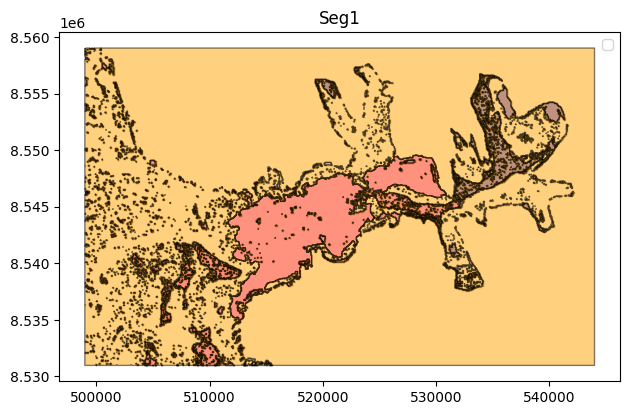

In [12]:
# Plot polygons
ax = bplnlent.plot(color='blue', edgecolor='black', alpha=0.5, label='Polygon 1')
bplnrd.plot(ax=ax, color='red', edgecolor='black', alpha=0.5, label='Polygon 2')
samarlent.plot(ax=ax, color='blue', edgecolor='black', alpha=0.5, label='Polygon 3')
samarrd.plot(ax=ax, color='red', edgecolor='black', alpha=0.5, label='Polygon 4')
burglent.plot(ax=ax, color='blue', edgecolor='black', alpha=0.5, label='Polygon 5')
burgrd.plot(ax=ax, color='red', edgecolor='black', alpha=0.5, label='Polygon 6')
isbjlent.plot(ax=ax, color='blue', edgecolor='black', alpha=0.5, label='Polygon 7')
isbjrd.plot(ax=ax, color='red', edgecolor='black', alpha=0.5, label='Polygon 8')
mainbasin.plot(ax=ax, color='magenta', edgecolor='black', alpha=0.5, label='Polygon 9')
class_gdf.plot(ax=ax, color='orange', edgecolor='black', alpha=0.5, label='Polygon 10')

# Add legend and title
plt.legend(['Polygon 1', 'Polygon 2', 'Polygon 3', 'Polygon 4', 'Polygon 5', 'Polygon 6', 'Polygon 7', 'Polygon 8', 'Polygon 9'])
plt.title('Seg1')
plt.tight_layout()
plt.show()

In [13]:
overlay = gdf[(gdf['area']<= 1000000000)]
# overlay = gdf[(gdf['area']>= 100000000)] #Keeping just in case it decides to work next week or something.

### Concatenated shapes

In [14]:
# Concatenate all to create a multipolygon shapefile

clusterk = pd.concat([overlay,bplnlent,bplnrd,samarlent,samarrd,burglent,burgrd,isbjlent,isbjrd,mainbasin], keys=['overlay','bplnlent','bplnrd','samarlent','samarrd','burglent','burgrd','isbjlent','isbjrd','mainbasin']).reset_index(level=0).rename(columns={'level_0': 'Source'})

In [15]:
# Remove the smallest segments

refined = clusterk[(clusterk['area'] >= 10000)]

In [16]:
# Output shapefile to path

# refined.to_parquet("C:/Users/jullian.williams/Desktop/HIRLOMAP/frnd/shapefilename.shp")

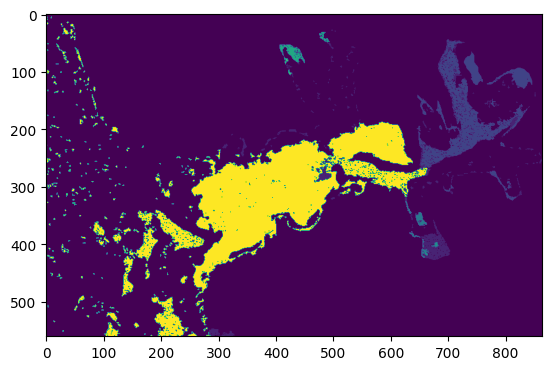

In [18]:
bounds = refined.total_bounds
resolution = 50  # Define resolution (e.g., 50x50 units per pixel)
width = int((bounds[2] - bounds[0]) / resolution)
height = int((bounds[3] - bounds[1]) / resolution)
transform = rio.transform.from_bounds(*bounds, width, height)

# Define class colors (e.g., mapping vector attributes to raster values)
class_colors = {
    'overlay': 1,
    'bplnlent': 2,
    'bplnrd': 3,
    'samarlent': 4,
    'samarrd': 5,
    'burglent': 6,
    'burgrd': 7,
    'isbjlent': 8,
    'isbjrd': 9,
    'mainbasin': 10,

    # 'overlay': 'black',
    # 'bplnlent': 'slategrey',
    # 'bplnrd': 'lightsteelblue',
    # 'samarlent': 'blueviolet',
    # 'samarrd': 'thistle',
    # 'burglent': 'darkviolet',
    # 'burgrd': 'mediumpurple',
    # 'isbjlent': 'darkmagenta',
    # 'isbjrd': 'mediumvioletred',
    # 'mainbasin': 'palevioletred',
}
# Prepare shapes and values for rasterization
shapes = [(geom, class_colors[attr]) for geom, attr in zip(refined.geometry, refined['Source'])]

# Rasterize vector data
rasterized = rasterize(
    shapes=shapes,
    out_shape=(height, width),
    transform=transform,
    fill=0,  # Background value
    dtype="uint8"
)
plt.imshow(rasterized)

# with rio.open(
#     "C:/Users/jullian.williams/Desktop/HIRLOMAP/frnd/whatever2.tiff",
#     "w",
#     driver="GTiff",
#     height=height,
#     width=width,
#     count=1,
#     dtype=rasterized.dtype,
#     crs= src_.crs,
#     transform=transform,
# ) as dst:
#     dst.write(rasterized, 1)

# # Plot the raster
# plt.imshow(rasterized, cmap=plt.matplotlib.colors.ListedColormap([class_colors[val] for val in sorted(class_colors)]))
# # plt.colorbar()
# plt.show()

#There was a comment here. That's all I'll say. I'd like to keep my brain inside my skull. :)